# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [ ]:
#import pandas as pd
#df = pd.read_csv('data/human_body_temperature.csv')

In [112]:
#start here
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
temp_df=pd.read_csv('data/human_body_temperature.csv')

1)Is the distribution of body temperatures normal?

In [113]:
temp_df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [114]:
mean=temp_df['temperature'].mean()
mean

98.24923076923075

In [115]:
median=temp_df['temperature'].median()
median

98.3

In [116]:
mode=temp_df['temperature'].mode()
mode

0    98.0
dtype: float64

In [117]:
skewness=temp_df['temperature'].skew()
skewness

-0.004419131168995771

In [118]:
kurtosis=temp_df['temperature'].kurt()
kurtosis

0.7804573950337375

In [119]:
temp_df.temperature.unique()

array([ 99.3,  98.4,  97.8,  99.2,  98. ,  98.8,  98.6,  96.7,  98.2,
        98.7,  98.3,  97.2,  99.4,  98.1,  97.6,  98.5,  99.5,  99.1,
        97.9,  96.4,  96.9,  99. ,  97.4,  97.1,  98.9,  97.7,  97.5,
       100. ,  96.8,  99.9,  97. ,  97.3, 100.8,  96.3])

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import norm
import scipy.stats
import math


Check the histograms to check the distributions 

In [121]:
temp_obs = temp_df.temperature.sort_values()

In [122]:
bin_values = np.arange(start=temp_obs.min(), stop=temp_obs.max(), step=.05)

In [123]:
mu, std = temp_obs.mean(),temp_obs.std()

In [124]:
p=norm.pdf(temp_obs,mu,std)

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Temperature Mean:98.249 *** Std. Dev:0.7331 *** Mode:98.0')

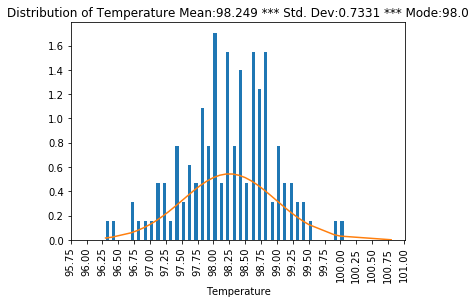

In [125]:
plt.hist(temp_obs,bins=bin_values,normed=True,stacked=True)
plt.plot(temp_obs, p)
plt.xlabel('Temperature')
#xticks = np.arange(96.0,101.0,0.1)
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title(('Distribution of Temperature Mean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std. Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_obs.mode().values[0])))))

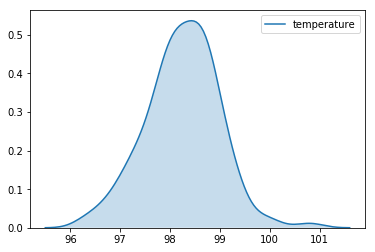

In [126]:
sns.kdeplot(temp_df.temperature, shade=True)

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


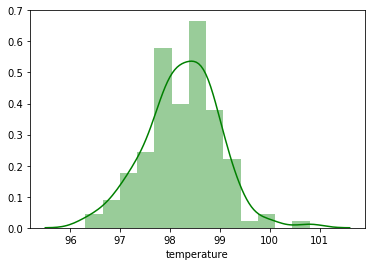

In [127]:
sns.distplot(temp_df.temperature.dropna(),color=sns.desaturate("green",1))

Let's do a normality test

In [128]:
test_stats, p_value=scipy.stats.normaltest(temp_obs)
p_value

0.2587479863488212

In [129]:
#Null hypothesis Ho= The distriution of body temperature is normal.
if p_value < 0.05:#reject the null hypothesis
    print("Not Normal Distribution")
else:#We fail to reject the null hypothesis that the distribution is normal.
    print("Normal Distribution")

Normal Distribution


The skeweness and kurtosis are close to zero and between -1 to 1.The kde ,dist, and hist plot above also shows that the distribution is normal. We also did a normality test.
So based on the p values and the observed plots, we can say that distribution is normal.


2)Is the sample size large? Are the observations independent

In [130]:
len(temp_df)

130

The samples consists of temprature of different persons and are independent because they are taken from different people and the sample size=130 > 30 and sufficiently large for CLT(Central Limit therom)

3)Is the true population mean really 98.6 degrees F?Would you use a one-sample or two-sample test? Why?In this situation, is it appropriate to use the t or z statistic?Now try using the other test. How is the result be different? Why?

Let our null hyothesis Ho: True population mean (mu_null) = 98.6 degrees F Alternate Hypothesis H1= True population mean (mu_alt) less than 98.6 degree F. Z-test can be used only when the population standard deviation is known. Since that's unknown, we use the t-test.One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F

In [131]:
mean_sample= mean
mean_sample

98.24923076923075

In [132]:
t_statistics, p_value = stats.stats.ttest_1samp(temp_df['temperature'],98.6)
print ("T_statistics :", t_statistics)
print ("p-value:",p_value)

T_statistics : -5.4548232923645195
p-value: 2.4106320415561276e-07


Since p-value is less than 0.05 we reject the null hypothesis that mu_null=98.6 degree F. Therefore,
we go ahead with the alternate hypothesis that mu_alt is less than 98.6 degree F.

4) At what temperature should we consider someone's temperature to be "abnormal"?


In [133]:
std_error= temp_df['temperature'].std()
std_error

0.7331831580389456

For 95% confidence interval, the z-value =1.96. And to get the margin of error we multiply the value of z
with the std_error.

In [134]:
margin_error= 1.96*std_error
margin_error

1.4370389897563334

In [135]:
#we find the confidence interval(CI) which be in the range (mean-margin_error, mean+margin_error)
CI=[mean-1.437, mean+1.437]
CI


[96.81223076923075, 99.68623076923075]

Therefore any temperature that falls outside this range can be considered abnormal.

4.Is there a significant difference between males and females in normal temperature?
What test did you use and why?Write a story with your conclusion in the context of the original problem.

In [136]:
##Male Temperatures
male=temp_df[temp_df.gender=='M']
male.shape

(65, 3)

In [137]:
male.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [138]:
male_mean_temp=male.temperature.mean()
male_mean_temp

98.10461538461537

In [139]:
male_std_temp=male.temperature.std()
male_std_temp

0.698755762326591

In [140]:
##Female Temperatures
female=temp_df[temp_df.gender=='F']
female.shape

(65, 3)

In [141]:
female.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [142]:
female_mean_temp=female.temperature.mean()
fem_mean_temp

98.39384615384614

In [143]:
female_std_temp=fem.temperature.std()
female_std_temp

0.7434877527313664

In [144]:
## Diference in mean of Male and Female temperatures
mean_diff=female_mean_temp - male_mean_temp
mean_diff

0.2892307692307696

In [145]:
## Standard Error Calculation(SE)
SE=((male_std_temp**2)/65 + (female_std_temp**2)/65)**0.5
SE

0.12655395041982645

In [146]:
## Degrees of Freedom Calculation(DF)
F1=female_std_temp**2/65
M1=male_std_temp**2/65
DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.51030083039093

In [147]:

#Since we have 2 different groups, we'll be doing a 2 sample t-test to get the p-value and t-statistics.
#Use 0.05 Significance level.
t_val=((female_mean_temp-male_mean_temp)-0)/SE
t_val


2.2854345381656103

In [148]:
#two-sided pvalue
p_value = stats.t.sf(np.abs(2.29), 128)*2  
p_value

0.023657711289024146

In [149]:
#Ho that mean of female and male temperature are the same will be rejected.
if p_value<0.05:
    print('Ho is rejected and there is a significant difference b/n male and female body temperatures.')
else: 
    print('Ho: Mean of female and amle temperature are the same is not rejected!')

Ho is rejected and there is a significant difference b/n male and female body temperatures.


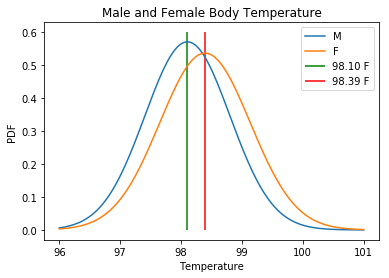

In [150]:
##Normal Distribution graph of Male and Female Temperatures
x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=male_mean_temp, scale=male_std_temp)    
pylab.plot(x,y1)
y2 = stats.norm.pdf(x, loc=female_mean_temp, scale=female_std_temp)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(men_mean_temp,0, 0.6, color='green')
pylab.vlines(fem_mean_temp,0,0.6, color='red')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()